# Vanilla Perceptron

2. You may pick any dataset from [here](https://archive.ics.uci.edu/ml/datasets.php).

Data set chosen: [BankNote Authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [2]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import pandas as pd

file_path = "./data_banknote_authentication.txt"    #reading the input data
data=pd.read_csv(file_path, delimiter=",")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3.6216    1371 non-null   float64
 1   8.6661    1371 non-null   float64
 2   -2.8073   1371 non-null   float64
 3   -0.44699  1371 non-null   float64
 4   0         1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


1. Implement the vanilla perceptron classifier algorithm

In [19]:
x=data[['3.6216', '8.6661', '8.6661', '-0.44699']].to_numpy()    #feautures
y=data['0'].to_numpy()                                           #labels

noOfSamples=x.shape[0]        #number od observations
D=x.shape[1]                  #number of dimensions
epochs=100                    #number of epochs

#sci-kit learn library
classify=Perceptron(max_iter=epochs, random_state=0)
classify.fit(x,y)

print(classify.coef_)
print(classify.intercept_)

#implementing vannila perceptron scratch
x=np.insert(x, 0, 1, axis=1)      #managing the bias by adding a constant dimension
y[y==0]=-1                        #change the labels to implement the perceptron algorithm
w=np.zeros(D+1)                   #initializing w=0 misclassifies everything

for epoch in range(epochs):       #loop over the number of epochs
	shuffle=np.random.permutation(noOfSamples)     #randomly pick datapoints
	for i in shuffle:             #loop over ezch (data, label) pair in dataset
		if(np.dot(w, x[i,:])*y[i]<=0):             #if the pair is misclassified
			w+=y[i]*x[i,:]        #update the weight vector
            
print(w)

[[-18.6197597  -4.463227   -4.463227    0.8398273]]
[6.]
[  4.        -26.628601   -5.8653522  -5.8653522   4.6414226]


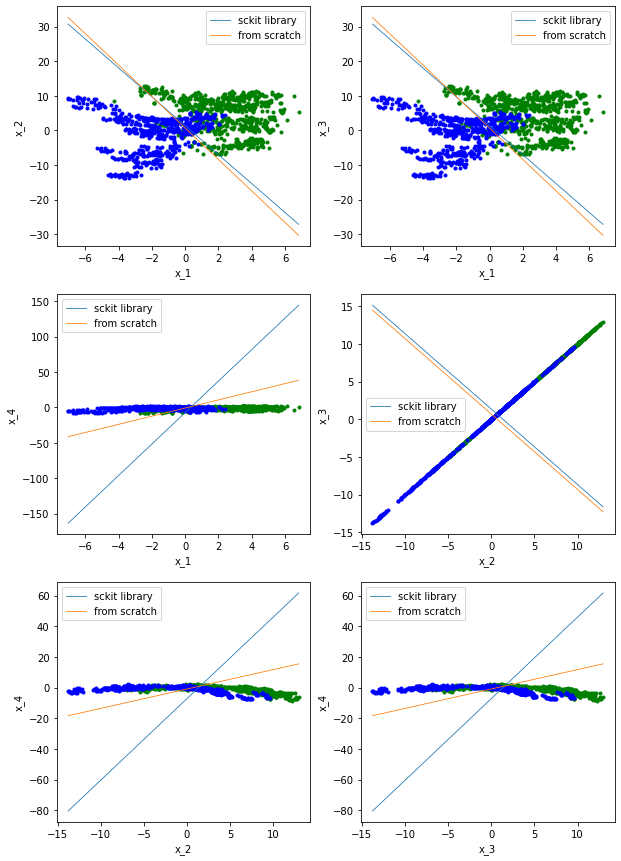

In [20]:
#Plotting each of the four dimensions pairwise
fig = plt.figure(figsize=(10,15))
x1=np.array([np.min(x[:,1]), np.max(x[:,1])])
plt.subplot(3,2,1)
plt.scatter(x[:,1][y==-1],x[:,2][y==-1], c='green', marker='.')
plt.scatter(x[:,1][y==1],x[:,2][y==1], c='blue', marker='.')

m=-classify.coef_[0, 0]/classify.coef_[0, 1]
c=-classify.intercept_/classify.coef_[0, 1]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='sckit library')

m=-w[1]/w[2]
c=-w[0]/w[2]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='from scratch')
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend()

plt.subplot(3,2,2)
plt.scatter(x[:,1][y==-1],x[:,3][y==-1], c='green', marker='.')
plt.scatter(x[:,1][y==1],x[:,3][y==1], c='blue', marker='.')

m=-classify.coef_[0, 0]/classify.coef_[0, 2]
c=-classify.intercept_/classify.coef_[0, 2]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='sckit library')

m=-w[1]/w[3]
c=-w[0]/w[3]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='from scratch')
plt.xlabel("x_1")
plt.ylabel("x_3")
plt.legend()

plt.subplot(3,2,3)
plt.scatter(x[:,1][y==-1],x[:,4][y==-1], c='green', marker='.')
plt.scatter(x[:,1][y==1],x[:,4][y==1], c='blue', marker='.')

m=-classify.coef_[0, 0]/classify.coef_[0, 3]
c=-classify.intercept_/classify.coef_[0, 3]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='sckit library')

m=-w[1]/w[4]
c=-w[0]/w[4]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='from scratch')
plt.xlabel("x_1")
plt.ylabel("x_4")
plt.legend()

x1=np.array([np.min(x[:,2]), np.max(x[:,2])])
plt.subplot(3,2,4)
plt.scatter(x[:,2][y==-1],x[:,3][y==-1], c='green', marker='.')
plt.scatter(x[:,2][y==1],x[:,3][y==1], c='blue', marker='.')

m=-classify.coef_[0, 1]/classify.coef_[0, 2]
c=-classify.intercept_/classify.coef_[0, 2]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='sckit library')

m=-w[2]/w[3]
c=-w[0]/w[3]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='from scratch')
plt.xlabel("x_2")
plt.ylabel("x_3")
plt.legend()

plt.subplot(3,2,5)
plt.scatter(x[:,2][y==-1],x[:,4][y==-1], c='green', marker='.')
plt.scatter(x[:,2][y==1],x[:,4][y==1], c='blue', marker='.')

m=-classify.coef_[0, 1]/classify.coef_[0, 3]
c=-classify.intercept_/classify.coef_[0, 3]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='sckit library')

m=-w[2]/w[4]
c=-w[0]/w[4]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='from scratch')
plt.xlabel("x_2")
plt.ylabel("x_4")
plt.legend()

x1=np.array([np.min(x[:,3]), np.max(x[:,3])])
plt.subplot(3,2,6)
plt.scatter(x[:,3][y==-1],x[:,4][y==-1], c='green', marker='.')
plt.scatter(x[:,3][y==1],x[:,4][y==1], c='blue', marker='.')

m=-classify.coef_[0, 2]/classify.coef_[0, 3]
c=-classify.intercept_/classify.coef_[0, 3]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='sckit library')

m=-w[3]/w[4]
c=-w[0]/w[4]
y1=m*x1+c
plt.plot(x1, y1, linewidth=0.8, label='from scratch')
plt.xlabel("x_3")
plt.ylabel("x_4")
plt.legend()

plt.show()

In [9]:
#method to calculate and return the confusion matrix given the predicted labels and original labels
def getConfusionMatrix(y_pred, y):
    confusionMatrix=np.zeros((2,2))
    confusionMatrix[0,0]=np.count_nonzero(np.logical_and(y_pred==1, y==1))
    confusionMatrix[0,1]=np.count_nonzero(np.logical_and(y_pred==1, y==-1))
    confusionMatrix[1,0]=np.count_nonzero(np.logical_and(y_pred==-1, y==1))
    confusionMatrix[1,1]=np.count_nonzero(np.logical_and(y_pred==-1, y==-1))
    return confusionMatrix

#method to return the accuracy given the confusion matrix
def getAccuracy(cm):
    return (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

x_=data[['3.6216', '8.6661', '8.6661', '-0.44699']].to_numpy()
y_pred=classify.predict(x_)
print("Confusion Matrix for Perceptron implemented by sklearn:")
conf_scikit=getConfusionMatrix(y_pred, y)
print(conf_scikit)

y_pred=np.sign(np.dot(x, w))
print("Confusion Matrix for Perceptron implemented from scratch:")
conf_vanilla=getConfusionMatrix(y_pred, y)
print(conf_vanilla)

Confusion Matrix for Perceptron implemented by sklearn:
[[478.  70.]
 [132. 691.]]
Confusion Matrix for Perceptron implemented from scratch:
[[377. 114.]
 [233. 647.]]


3. Implement either the voted perceptron or the averaged perceptron. 

# Voted Perceptron

In [11]:
x=data[['3.6216', '8.6661', '8.6661', '-0.44699']].to_numpy()
y=data['0'].to_numpy()

noOfSamples=x.shape[0]
D=x.shape[1]
epochs=100

#scratch
x=np.insert(x, 0, 1, axis=1)
y[y==0]=-1
w=np.zeros(D+1)

vote=0
W=[]
Votes=[]
epochError_Voted=np.zeros(epochs)
epochAccuracy_Voted=np.zeros(epochs)

for epoch in range(epochs):
    noOfEpochErrors=0                           #keep a count of the number of misclassifications in the current epoch
    shuffle=np.random.permutation(noOfSamples)
    for i in shuffle:
        if(np.dot(w, x[i,:])*y[i]<=0):
            noOfEpochErrors+=1                  #count the misclassification
            Votes.append(vote)                  #append the votes for the previous weights
            w+=y[i]*x[i,:]                      #update the weights
            vote=1                              #reinitialize the votes for the current weights
            W.append(w)                         #appends the weights corresponding to the last vote
        else:
            vote+=1                             #correct classification add a vote
    epochError_Voted[epoch]=noOfEpochErrors
    y_p=np.sign(np.dot(Votes, np.sign(np.dot(W, x.T))))
    epochAccuracy_Voted[epoch]=getAccuracy(getConfusionMatrix(y_p, y))
    
    

W=np.array(W)
Votes=np.array(Votes)

y_pred_voted=np.sign(np.dot(Votes, np.sign(np.dot(W, x.T))))   #y=sign(sum(c*sign(a))
print("Confusion Matrix for Voted Perceptron implemented from scratch:")
conf_voted=getConfusionMatrix(y_pred_voted, y)
print(conf_voted)

Confusion Matrix for Voted Perceptron implemented from scratch:
[[364. 120.]
 [246. 641.]]


# Averaged Perceptron

In [22]:
x=data[['3.6216', '8.6661', '8.6661', '-0.44699']].to_numpy()
y=data['0'].to_numpy()

noOfSamples=x.shape[0]
D=x.shape[1]
epochs=100

#scratch
x=np.insert(x, 0, 1, axis=1)
y[y==0]=-1
w=np.zeros(D+1)

vote=0
W=[]
Votes=[]
epochError_Averaged=np.zeros(epochs)
epochAccuracy_Averaged=np.zeros(epochs)

for epoch in range(epochs):
    noOfEpochErrors=0                           #keep a count of the number of misclassifications in the current epoch
    shuffle=np.random.permutation(noOfSamples)
    for i in shuffle:
        if(np.dot(w, x[i,:])*y[i]<=0):          #if a misclassification
            noOfEpochErrors+=1                  #count the number of votes till now for it
            Votes.append(vote)                  #and append it
            w+=y[i]*x[i,:]                      #update the weights
            vote=1                              #reinitialize votes for new weights
            W.append(w)                         #append weights corresponding to last vote
        else:
            vote+=1                             #classified correctly, upvote weights
    epochError_Averaged[epoch]=noOfEpochErrors
    y_p=np.sign(np.dot(Votes, np.dot(W, x.T)))
    epochAccuracy_Averaged[epoch]=getAccuracy(getConfusionMatrix(y_p, y))

W=np.array(W)
Votes=np.array(Votes)

y_pred_averaged=np.sign(np.dot(Votes, np.dot(W, x.T)))    #y=sign(sum(c*a))
print("Confusion Matrix for Averaged Perceptron implemented from scratch:")
conf_averaged=getConfusionMatrix(y_pred_averaged, y)
print(conf_averaged)

Confusion Matrix for Averaged Perceptron implemented from scratch:
[[522. 114.]
 [ 88. 647.]]


In [23]:
#just for the sake of comparision
x=data[['3.6216', '8.6661', '8.6661', '-0.44699']].to_numpy()
y=data['0'].to_numpy()

noOfSamples=x.shape[0]
D=x.shape[1]
epochs=100

#scratch
x=np.insert(x, 0, 1, axis=1)
y[y==0]=-1
w=np.zeros(D+1)

epochError=np.zeros(epochs)
epochAccuracy=np.zeros(epochs)

for epoch in range(epochs):
    noOfEpochErrors=0
    shuffle=np.random.permutation(noOfSamples)
    for i in shuffle:
        if(np.dot(w, x[i,:])*y[i]<=0):
            noOfEpochErrors+=1
            w+=y[i]*x[i,:]
    epochError[epoch]=noOfEpochErrors
    y_p=np.sign(np.dot(w, x.T))
    epochAccuracy[epoch]=getAccuracy(getConfusionMatrix(y_p, y))

4. Compare vanilla (1) with (3) in form of a graph based on the accuracy and number of epochs. (Accuracy on the test case)

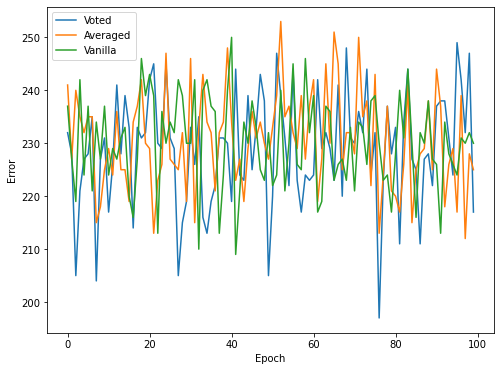

In [24]:
#plot the misclassifications made each epoch for each of the three perceptrons
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs), epochError_Voted, label="Voted")
plt.plot(np.arange(epochs), epochError_Averaged, label="Averaged")
plt.plot(np.arange(epochs), epochError, label="Vanilla")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

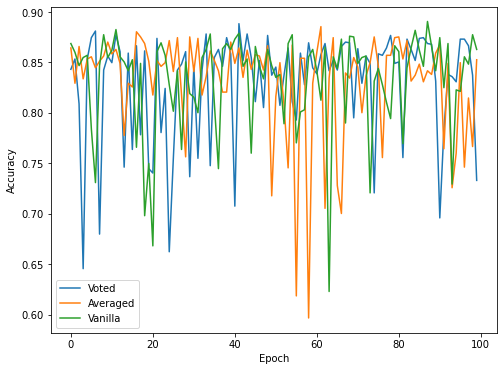

In [26]:
#plot the accuracy after each epoch of the three preceptrons
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs), epochAccuracy_Voted, label="Voted")
plt.plot(np.arange(epochs), epochAccuracy_Averaged, label="Averaged")
plt.plot(np.arange(epochs), epochAccuracy, label="Vanilla")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()